In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
diabetes = load_diabetes()

In [3]:
df_X = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_y = pd.Series(data=diabetes.target, name='target')
print("df_X shape:", df_X.shape)
print("df_y shape:", df_y.shape)

df_X shape: (442, 10)
df_y shape: (442,)


In [4]:
X_array = df_X.values
y_array = df_y.values
print("X_array shape:", X_array.shape)
print("y_array shape:", X_array.shape)

X_array shape: (442, 10)
y_array shape: (442, 10)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


In [6]:
W = np.random.rand(10)
b = np.random.rand()

In [7]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [8]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

In [9]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [10]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)

    # y_pred 준비
    y_pred = model(X, W, b)

    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)

    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [11]:
LEARNING_RATE = 0.07
losses = []

for i in range(1, 5000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5561.7732
Iteration 200 : Loss 5159.4721
Iteration 300 : Loss 4834.1218
Iteration 400 : Loss 4569.4498
Iteration 500 : Loss 4352.7487
Iteration 600 : Loss 4174.0861
Iteration 700 : Loss 4025.6900
Iteration 800 : Loss 3901.4707
Iteration 900 : Loss 3796.6497
Iteration 1000 : Loss 3707.4703
Iteration 1100 : Loss 3630.9734
Iteration 1200 : Loss 3564.8219
Iteration 1300 : Loss 3507.1653
Iteration 1400 : Loss 3456.5336
Iteration 1500 : Loss 3411.7545
Iteration 1600 : Loss 3371.8894
Iteration 1700 : Loss 3336.1835
Iteration 1800 : Loss 3304.0261
Iteration 1900 : Loss 3274.9207
Iteration 2000 : Loss 3248.4611
Iteration 2100 : Loss 3224.3124
Iteration 2200 : Loss 3202.1967
Iteration 2300 : Loss 3181.8819
Iteration 2400 : Loss 3163.1720
Iteration 2500 : Loss 3145.9008
Iteration 2600 : Loss 3129.9260
Iteration 2700 : Loss 3115.1247
Iteration 2800 : Loss 3101.3902
Iteration 2900 : Loss 3088.6289
Iteration 3000 : Loss 3076.7584
Iteration 3100 : Loss 3065.7054
Iteration 3200 : 

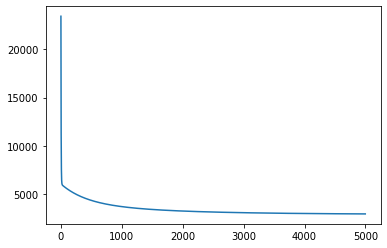

In [12]:
plt.plot(losses)
plt.show()

In [13]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse) #MSE 값
print(np.sqrt(mse)) #RMSE 값

2865.8745859157802
53.53386391729799


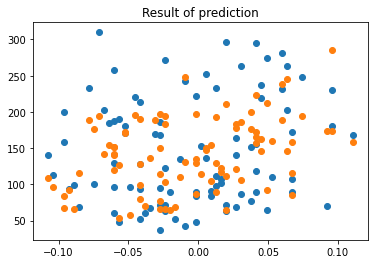

In [14]:
plt.title('Result of prediction')
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

회고

서론
데이터셋의 주제는 sklearn의 diabetes(당뇨병) 데이터로 당뇨를 예측하는 것입니다.

개발 과정
예측 모델을 만든 후 손실함수와 기울기 함수로 모델을 학습하여 loss값을 3000이하로 만들고  통해 모델 성능 결과를 확인하고 그래프로 시각화하여 확인해봅니다.

결과 및 토론
LEARNING_RATE = 0.07로 설정하고 5000번을 돌렸을 때 loss값이 2901까지 떨어졌습니다. learning rate가 낮고 학습 횟수가 낮을수록 loss값이 떨어지는 폭이 작아 3000에 도달하기 힘들어서 값을 높혀가며 변화시켰을 때 이러한 결과를 확인할 수 있었습니다.

배운 점 및 회고
라이브러리를 사용하지 않고 수학 수식을 코드화하여 학습을 진행해보았고 더욱 더 자세하게 선형회귀에 대해 이해해볼 수 있는 좋은 기회가 되었습니다. 하지만 시각화시킨 그래프의 결과가 좋은 것 같지 않아서 아쉬움이 많이 남았습니다. 이에 대한 공부가 더 필요할 것 같습니다.